In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import warnings
import time

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import iqr
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import iqr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from pandas_profiling import ProfileReport
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor as rf_reg
from sklearn.model_selection import RandomizedSearchCV as randomCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import feature_selection
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from plotnine import *
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler
import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

%load_ext nb_black
%matplotlib inline
warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [34]:
df = pd.read_csv("data/bmw.csv")

<IPython.core.display.Javascript object>

## Phân tích khám pha dữ liệu (EDA)

In [35]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


<IPython.core.display.Javascript object>

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


<IPython.core.display.Javascript object>

### <p style="color:blue">Nhận xét</p>

In [38]:
"""
dữ liệu ko có giá trị null
có 2 kiểu dữ liệu trong dataset là object (string) và numeric
"""

'\ndữ liệu ko có giá trị null\ncó 2 kiểu dữ liệu trong dataset là object (string) và numeric\n'

<IPython.core.display.Javascript object>

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


<IPython.core.display.Javascript object>

### <p style="color:red">Xác định thuộc tính từ requirements</p>
<p style="color:blue">input: <> price: tất cả các thuộc tính trừ price</p>
<p style="color:blue">output: price</p>

##### variable type:
- predictor: <> price: các thuộc tính khác price
- target: price

##### data type:
- object (char/string)
- numeric

In [39]:
numbers = [i for i in df.columns if df.dtypes[i] != "object"]
objects = [i for i in df.columns if df.dtypes[i] == "object"]

<IPython.core.display.Javascript object>

In [40]:
### xét các biến có dtype là object
i = 0
for obj in objects:
    print(i, "/", obj, "\t len=", len(df[obj].unique()), ":", df[obj].unique())
    i = i + 1

0 / model 	 len= 24 : [' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
1 / transmission 	 len= 3 : ['Automatic' 'Manual' 'Semi-Auto']
2 / fuelType 	 len= 5 : ['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']


<IPython.core.display.Javascript object>

In [41]:
### xét các biến có dtype != object
i = 0
for obj in numbers:
    print(
        i,
        "/",
        obj,
        "\t len =",
        len(df[obj].unique()),
        df[obj].unique() if len(df[obj].unique()) < 20 else "",
    )
    i = i + 1

0 / year 	 len = 25 
1 / price 	 len = 3777 
2 / mileage 	 len = 8086 
3 / tax 	 len = 38 
4 / mpg 	 len = 102 
5 / engineSize 	 len = 17 [2.  3.  1.5 0.6 1.6 4.4 0.  2.2 2.5 4.  3.2 1.  5.  1.9 6.6 2.8 3.5]


<IPython.core.display.Javascript object>

### <p style="color:blue">Nhận xét</p>

In [42]:
"""
Từ kết quả trên, ta thấy:
identifier - categorical variables: fuelType, transmission, model, year, engineSize
continuous variable: price, mileage, mpg, tax
"""

'\nTừ kết quả trên, ta thấy:\nidentifier - categorical variables: fuelType, transmission, model, year, engineSize\ncontinuous variable: price, mileage, mpg, tax\n'

<IPython.core.display.Javascript object>

## Phân tích đơn biến


### Continuous Variable

In [43]:
def continuous_univariate_analysis(f):
    print("1\ Describe: \n", f.describe(), "\n")
    print("2\ Meadian: ", f.median())
    print("3\ Mode: ", f.mode)
    print("4\ Range: ", f.values.ptp())
    print("5\ Variance: ", f.var())
    print("6\ Số NaN: ", f.isnull().sum())
    print("7\ \tQ1 = ", np.quantile(f, 0.25))
    print("   \tQ3 = ", np.quantile(f, 0.75))
    print("   \tIQR = ", iqr(f))

    print("8\ Skew: ", f.skew())
    if f.skew() > 0:
        print("Phân phối lệch phải")
    elif f.skew() == 0:
        print("Phân phối đối xứng")
    else:
        print("Phân phối lệch trái")

    print("9\ Kurtosis: ", f.kurtosis())
    if f.kurtosis() > 0:
        print("Phân phối nhọn hơn pp chuẩn")
    elif f.kurtosis() == 0:
        print("Phân phối đối xứng")
    else:
        print("Phân phối bẹt hơn pp chuẩn")

<IPython.core.display.Javascript object>

In [44]:
def visualize_histogram(f):
    # Histogram
    plt.subplot(1, 2, 1)
    sns.distplot(f)

    plt.subplot(1, 2, 2)
    plt.hist(f)
    plt.show()

<IPython.core.display.Javascript object>

In [45]:
def visualize_boxplot(f):
    plt.boxplot(f)
    plt.show()

<IPython.core.display.Javascript object>

In [46]:
def find_outliers(f):
    Q1 = np.quantile(f, 0.25)
    Q3 = np.quantile(f, 0.75)
    IQR = Q3 - Q1

    # số lượng outliers
    num_outliers = len(f[(f > Q3 + 1.5 * IQR) | (f < Q1 - 1.5 * IQR)])

    # tỉ lệ outliers so với mẫu
    ratio = num_outliers / f.shape[0]

    print("Số lượng outliers: ", num_outliers)
    print("Tỉ lệ outliers so với mẫu", ratio)

<IPython.core.display.Javascript object>

price
1\ Describe: 
 count     10781.000000
mean      22733.408867
std       11415.528189
min        1200.000000
25%       14950.000000
50%       20462.000000
75%       27940.000000
max      123456.000000
Name: price, dtype: float64 

2\ Meadian:  20462.0
3\ Mode:  <bound method Series.mode of 0        11200
1        27000
2        16000
3        12750
4        14500
         ...  
10776    19000
10777    14600
10778    13100
10779     9930
10780    15981
Name: price, Length: 10781, dtype: int64>
4\ Range:  122256
5\ Variance:  130314283.83466718
6\ Số NaN:  0
7\ 	Q1 =  14950.0
   	Q3 =  27940.0
   	IQR =  12990.0
8\ Skew:  1.5868864681260946
Phân phối lệch phải
9\ Kurtosis:  4.021487604504699
Phân phối nhọn hơn pp chuẩn


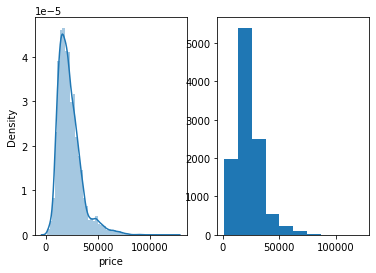

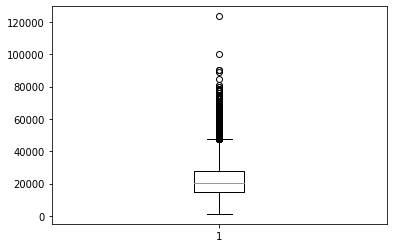

Số lượng outliers:  484
Tỉ lệ outliers so với mẫu 0.04489379463871626



mileage
1\ Describe: 
 count     10781.000000
mean      25496.986550
std       25143.192559
min           1.000000
25%        5529.000000
50%       18347.000000
75%       38206.000000
max      214000.000000
Name: mileage, dtype: float64 

2\ Meadian:  18347.0
3\ Mode:  <bound method Series.mode of 0        67068
1        14827
2        62794
3        26676
4        39554
         ...  
10776    40818
10777    42947
10778    25468
10779    45000
10780    59432
Name: mileage, Length: 10781, dtype: int64>
4\ Range:  213999
5\ Variance:  632180132.0739378
6\ Số NaN:  0
7\ 	Q1 =  5529.0
   	Q3 =  38206.0
   	IQR =  32677.0
8\ Skew:  1.38310055859714
Phân phối lệch phải
9\ Kurtosis:  2.2259986493497004
Phân phối nhọn hơn pp chuẩn


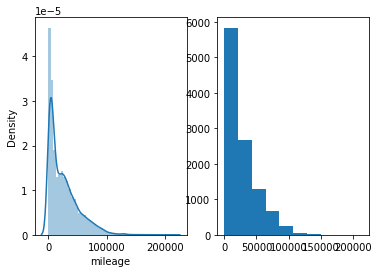

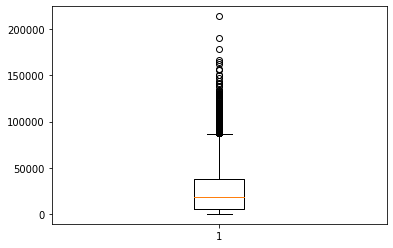

Số lượng outliers:  296
Tỉ lệ outliers so với mẫu 0.02745570911789259



mpg
1\ Describe: 
 count    10781.000000
mean        56.399035
std         31.336958
min          5.500000
25%         45.600000
50%         53.300000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64 

2\ Meadian:  53.3
3\ Mode:  <bound method Series.mode of 0        57.6
1        42.8
2        51.4
3        72.4
4        50.4
         ... 
10776    54.3
10777    60.1
10778    42.8
10779    64.2
10780    57.6
Name: mpg, Length: 10781, dtype: float64>
4\ Range:  465.3
5\ Variance:  982.004928568417
6\ Số NaN:  0
7\ 	Q1 =  45.6
   	Q3 =  62.8
   	IQR =  17.199999999999996
8\ Skew:  9.629234002651174
Phân phối lệch phải
9\ Kurtosis:  120.45934608072444
Phân phối nhọn hơn pp chuẩn


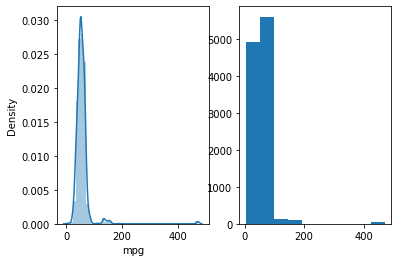

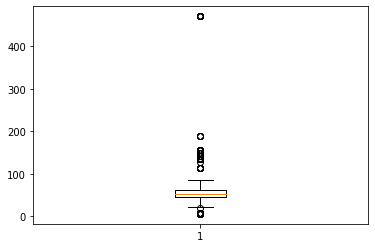

Số lượng outliers:  275
Tỉ lệ outliers so với mẫu 0.025507837862906967



tax
1\ Describe: 
 count    10781.000000
mean       131.702068
std         61.510755
min          0.000000
25%        135.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64 

2\ Meadian:  145.0
3\ Mode:  <bound method Series.mode of 0        125
1        145
2        160
3        145
4        160
        ... 
10776    150
10777    125
10778    200
10779     30
10780    125
Name: tax, Length: 10781, dtype: int64>
4\ Range:  580
5\ Variance:  3783.5730096357584
6\ Số NaN:  0
7\ 	Q1 =  135.0
   	Q3 =  145.0
   	IQR =  10.0
8\ Skew:  0.8278284621659369
Phân phối lệch phải
9\ Kurtosis:  9.25867753597994
Phân phối nhọn hơn pp chuẩn


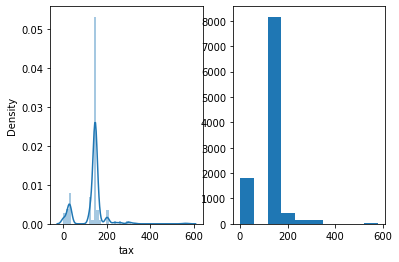

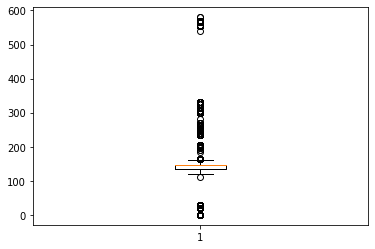

Số lượng outliers:  2733
Tỉ lệ outliers so với mẫu 0.2535015304702718





<IPython.core.display.Javascript object>

In [47]:
df_continuous = df[["price", "mileage", "mpg", "tax"]]
for i in df_continuous:
    print(i)
    continuous_univariate_analysis(df[i])
    visualize_histogram(df[i])
    visualize_boxplot(df[i])
    find_outliers(df[i])
    print("\n====================================================\n\n")

### <p style="color:blue">Nhận xét</p>

In [48]:
"""
Các biến có phân phối khá xấu, đều bị lệch phải 
=> cần phải chuẩn hóa dữ liệu
vd: data đều > 0 và bị lệch phải, phương sai lớn => có thể sử dụng log nomalization

Số lượng outliers lớn
=> đây là các outliers hợp lệ (mang tính đặc trưng của data)
=> nếu model xây dựng có score thấp thì cân nhắc tách các outliers ra để xây dựng 1 model mới
"""

'\nCác biến có phân phối khá xấu, đều bị lệch phải \n=> cần phải chuẩn hóa dữ liệu\nvd: data đều > 0 và bị lệch phải, phương sai lớn => có thể sử dụng log nomalization\n\nSố lượng outliers lớn\n=> đây là các outliers hợp lệ (mang tính đặc trưng của data)\n=> nếu model xây dựng có score thấp thì cân nhắc tách các outliers ra để xây dựng 1 model mới\n'

<IPython.core.display.Javascript object>

### Categorical Variable

In [49]:
def categorical_univariate_variable(f):
    print("1\ Mật độ phân phối: \n", f.value_counts())
    print("2\ Số giá trị NaN: \n", f.isnull().sum())
    print("\n\n3\ Tỉ lệ mật độ phân phối:\n", f.value_counts() / len(f))
    f.value_counts().plot.bar()
    plt.show()

<IPython.core.display.Javascript object>

fuelType
1\ Mật độ phân phối: 
 Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 Diesel      0.651795
Petrol      0.316946
Hybrid      0.027641
Other       0.003339
Electric    0.000278
Name: fuelType, dtype: float64


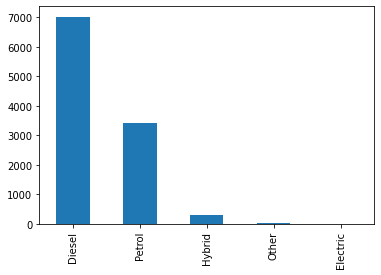




transmission
1\ Mật độ phân phối: 
 Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 Semi-Auto    0.432798
Automatic    0.332808
Manual       0.234394
Name: transmission, dtype: float64


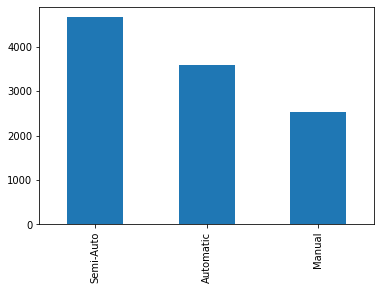




model
1\ Mật độ phân phối: 
  3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 6 Series     108
 Z4           108
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
  3 Series    0.226602
 1 Series    0.182636
 2 Series    0.113997
 5 Series    0.097950
 4 Series    0.092292
 X1          0.074576
 X3          0.051108
 X5          0.043410
 X2          0.026714
 X4          0.016603
 M4          0.011594
 6 Series    0.010018
 Z4          0.010018
 7 Series    0.009832
 X6          0.009832
 X7          0.005102
 i3          0.003988
 8 Series    0.003617
 M5          0.002690
 M3          0.002504
 M2          0.00

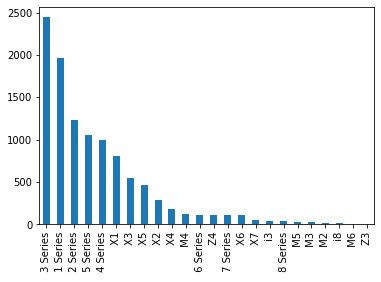




year
1\ Mật độ phân phối: 
 2019    3485
2016    1882
2017    1721
2015     922
2018     848
2020     733
2014     501
2013     357
2012     119
2011      51
2010      41
2009      30
2008      23
2007      16
2006      14
2004      12
2002       6
2005       6
1999       4
2001       3
2003       2
2000       2
1996       1
1997       1
1998       1
Name: year, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 2019    0.323254
2016    0.174566
2017    0.159633
2015    0.085521
2018    0.078657
2020    0.067990
2014    0.046471
2013    0.033114
2012    0.011038
2011    0.004731
2010    0.003803
2009    0.002783
2008    0.002133
2007    0.001484
2006    0.001299
2004    0.001113
2002    0.000557
2005    0.000557
1999    0.000371
2001    0.000278
2003    0.000186
2000    0.000186
1996    0.000093
1997    0.000093
1998    0.000093
Name: year, dtype: float64


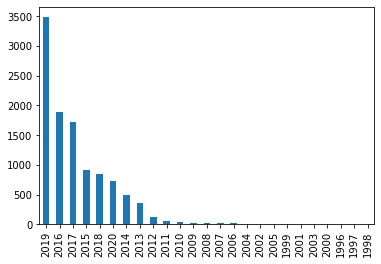




engineSize
1\ Mật độ phân phối: 
 2.0    6575
3.0    2458
1.5    1463
1.6     109
4.4      79
0.0      47
2.5      14
0.6       7
2.2       6
4.0       6
3.2       5
1.9       5
6.6       2
2.8       2
1.0       1
5.0       1
3.5       1
Name: engineSize, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 2.0    0.609869
3.0    0.227994
1.5    0.135702
1.6    0.010110
4.4    0.007328
0.0    0.004360
2.5    0.001299
0.6    0.000649
2.2    0.000557
4.0    0.000557
3.2    0.000464
1.9    0.000464
6.6    0.000186
2.8    0.000186
1.0    0.000093
5.0    0.000093
3.5    0.000093
Name: engineSize, dtype: float64


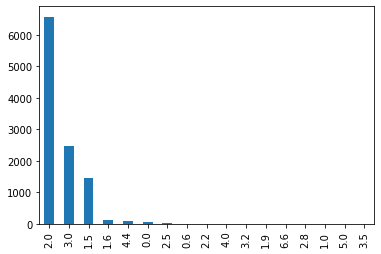

<IPython.core.display.Javascript object>

In [50]:
df_cate = df[["fuelType", "transmission", "model", "year", "engineSize"]]
for i in df_cate:
    print(i)
    categorical_univariate_variable(df[i])
    print("\n====================================================\n\n")

### <p style="color:blue">Nhận xét</p>

In [51]:
"""
Ở một số features, dữ liệu phân bố không đều.
vd: fuelType, data tập trung ở Diesel, Petrol và một phần nhỏ Hybrid; còn Other và Electric thì gần như không thấy được trên biểu đồ

=> cân nhắc gom các data thuộc các nhóm thiểu số thành 1 nhóm 
"""

'\nỞ một số features, dữ liệu phân bố không đều.\nvd: fuelType, data tập trung ở Diesel, Petrol và một phần nhỏ Hybrid; còn Other và Electric thì gần như không thấy được trên biểu đồ\n\n=> cân nhắc gom các data thuộc các nhóm thiểu số thành 1 nhóm \n'

<IPython.core.display.Javascript object>

### Phân tích đa biến

### Continuous - Continuous

In [52]:
df_corr = df_continuous.corr()
df_corr


,price,mileage,mpg,tax
price,1.000000,-0.605397,-0.204882,0.263484
mileage,-0.605397,1.000000,0.118609,-0.170747
mpg,-0.204882,0.118609,1.000000,-0.351798
tax,0.263484,-0.170747,-0.351798,1.000000


<IPython.core.display.Javascript object>

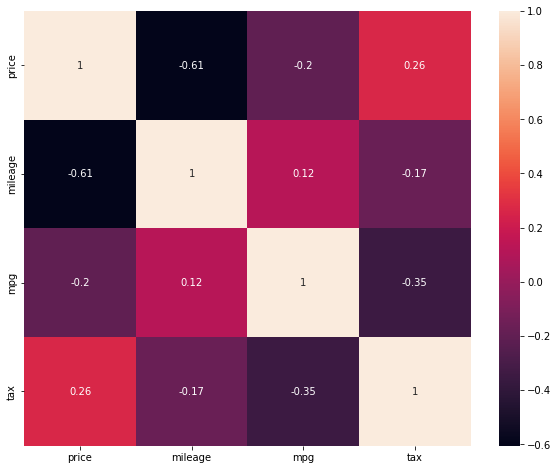

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True)
plt.show()

In [55]:
"""
price có tương quan mạnh với mileage
tax có tương quan với mpg
"""

'\nprice có tương quan mạnh với mileage\ntax có tương quan với mpg\n'

<IPython.core.display.Javascript object>

### Categorical - Continuous

In [56]:
model = ols(
    "price ~ C(fuelType)",
    data=df,
).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(fuelType),4.0,2.210244e+10,5.525610e+09,43.063999,6.671899e-36
Residual,10776.0,1.382686e+12,1.283116e+08,NaN,NaN


<IPython.core.display.Javascript object>

In [57]:
model = ols(
    "price ~ C(transmission)",
    data=df,
).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(transmission),2.0,2.658521e+11,1.329261e+11,1257.908494,0.0
Residual,10778.0,1.138936e+12,1.056723e+08,NaN,NaN


<IPython.core.display.Javascript object>

In [58]:
model = ols(
    "price ~ C(model)",
    data=df,
).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(model),23.0,6.899629e+11,2.999839e+10,451.42879,0.0
Residual,10757.0,7.148251e+11,6.645209e+07,NaN,NaN


<IPython.core.display.Javascript object>

In [59]:
model = ols(
    "price ~ C(year)",
    data=df,
).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(year),24.0,6.660610e+11,2.775254e+10,404.082117,0.0
Residual,10756.0,7.387270e+11,6.868045e+07,NaN,NaN


<IPython.core.display.Javascript object>

In [60]:
model = ols(
    "price ~ C(engineSize)",
    data=df,
).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(engineSize),16.0,3.388874e+11,2.118046e+10,213.890928,0.0
Residual,10764.0,1.065901e+12,9.902458e+07,NaN,NaN


<IPython.core.display.Javascript object>

### Category - Category

In [61]:
def cate_cate(dataset, f1, f2):
    table = pd.crosstab(f1, f2)
    table.plot.bar(stacked=True)
    plt.show()

    stat, p_value, dof, expected = chi2_contingency(table)
    # so sánh p-value
    proba = 0.95
    alpha = 1 - proba

    print("Statistic: ", stat)
    print("p-value: ", p_value)
    print("Dof: ", dof)
    if p_value <= alpha:
        print("Dependent (reject H0)")
    else:
        print("Independent (fail to H0)")

<IPython.core.display.Javascript object>

fuelType & transmission


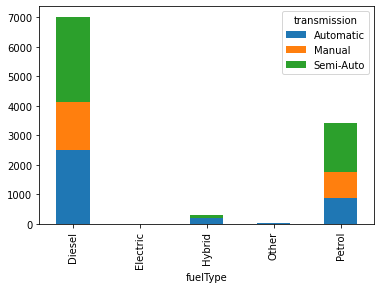

Statistic:  350.20796124622575
p-value:  8.175341301282378e-71
Dof:  8
Dependent (reject H0)


fuelType & model


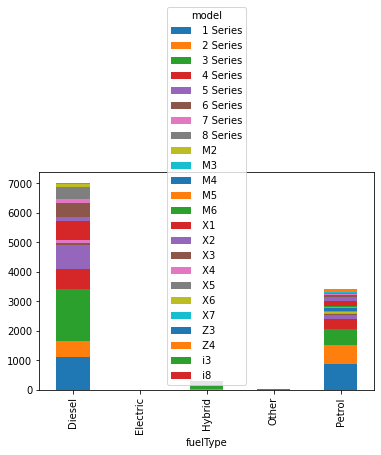

Statistic:  4456.566819934104
p-value:  0.0
Dof:  92
Dependent (reject H0)


fuelType & year


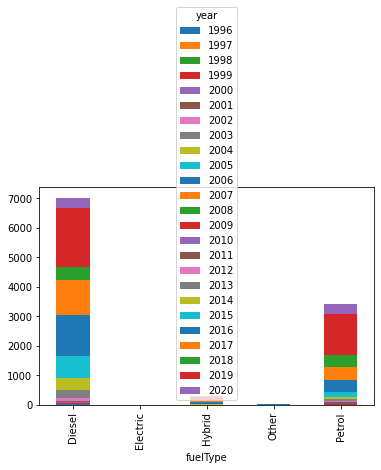

Statistic:  799.7037572545056
p-value:  1.893526710095939e-111
Dof:  96
Dependent (reject H0)


fuelType & engineSize


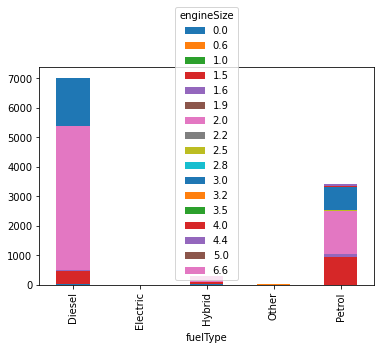

Statistic:  8240.100636672132
p-value:  0.0
Dof:  64
Dependent (reject H0)


transmission & transmission


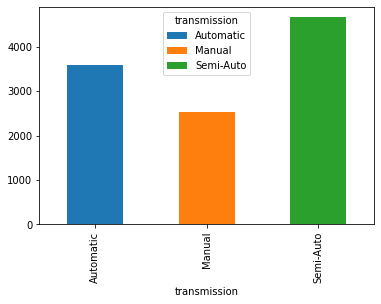

Statistic:  21562.0
p-value:  0.0
Dof:  4
Dependent (reject H0)


transmission & model


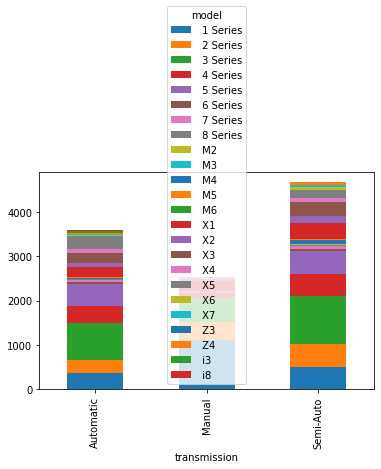

Statistic:  2436.8985352124582
p-value:  0.0
Dof:  46
Dependent (reject H0)


transmission & year


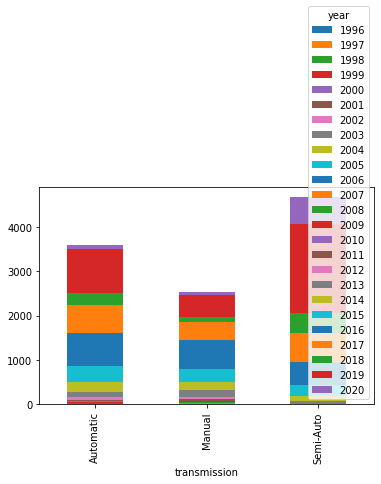

Statistic:  1637.5260916269888
p-value:  1.042871689539e-311
Dof:  48
Dependent (reject H0)


transmission & engineSize


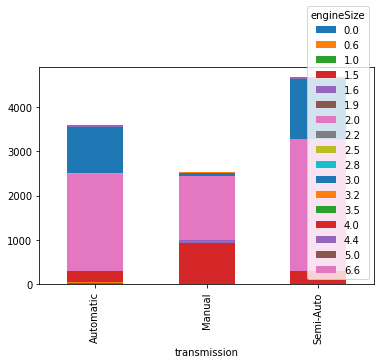

Statistic:  2161.0939698486286
p-value:  0.0
Dof:  32
Dependent (reject H0)


model & transmission


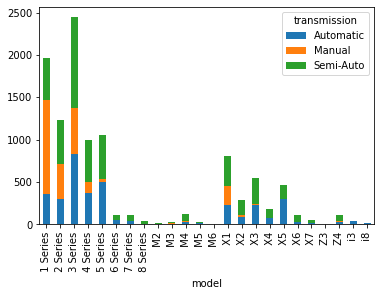

Statistic:  2436.898535212458
p-value:  0.0
Dof:  46
Dependent (reject H0)


model & model


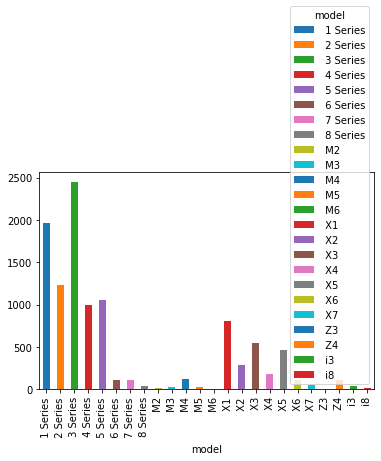

Statistic:  247963.0
p-value:  0.0
Dof:  529
Dependent (reject H0)


model & year


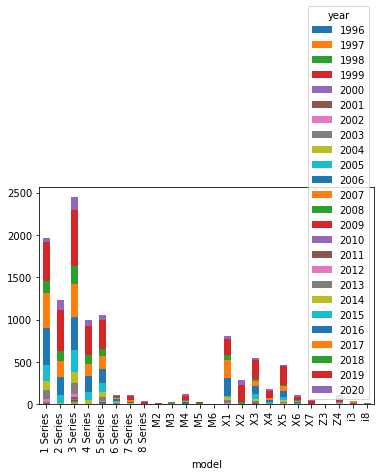

Statistic:  10090.68128528567
p-value:  0.0
Dof:  552
Dependent (reject H0)


model & engineSize


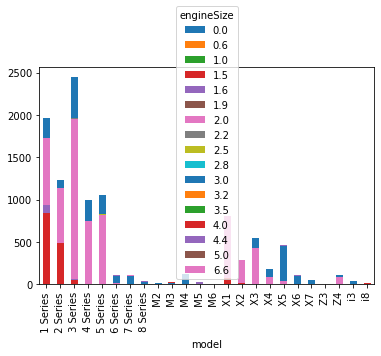

Statistic:  35332.854331555645
p-value:  0.0
Dof:  368
Dependent (reject H0)


year & transmission


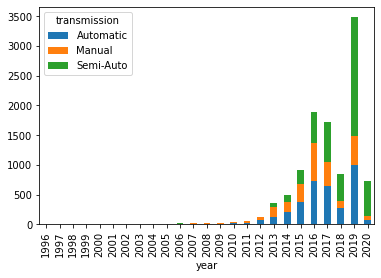

Statistic:  1637.5260916269888
p-value:  1.042871689539e-311
Dof:  48
Dependent (reject H0)


year & model


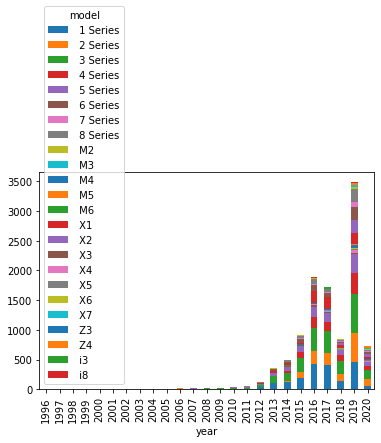

Statistic:  10090.681285285671
p-value:  0.0
Dof:  552
Dependent (reject H0)


year & year


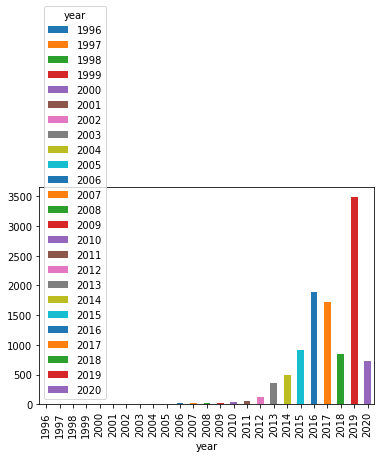

Statistic:  258744.0
p-value:  0.0
Dof:  576
Dependent (reject H0)


year & engineSize


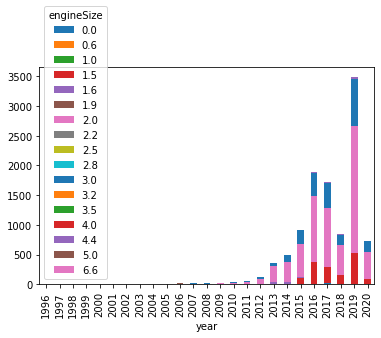

Statistic:  28409.58016487677
p-value:  0.0
Dof:  384
Dependent (reject H0)




<IPython.core.display.Javascript object>

In [62]:
lst_cat = ["fuelType", "transmission", "model", "year", "engineSize"]

for i in range(len(lst_cat) - 1):
    for j in range(1, len(lst_cat)):
        print(lst_cat[i], "&", lst_cat[j])
        cate_cate(df, df[lst_cat[i]], df[lst_cat[j]])
        print("\n")

### Phân tích tổng quát bằng ProfileReport

In [63]:
from pandas_profiling import ProfileReport

data_profile = ProfileReport(df)

<IPython.core.display.Javascript object>

In [64]:
data_profile.to_file("Car_Prediction_Analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [65]:
"""
vì hiển thị ProfileReport sẽ tốn dung lượng của file nên em comment lại.
Nếu thầy có sử dụng thì bỏ comment và chạy lại giúp em ạ.
Em có export kết quả của ProfileReport ra file HTML ạ.
"""
# data_profile

'\nvì hiển thị ProfileReport sẽ tốn dung lượng của file nên em comment lại.\nNếu thầy có sử dụng thì bỏ comment và chạy lại giúp em ạ.\nEm có export kết quả của ProfileReport ra file HTML ạ.\n'

<IPython.core.display.Javascript object>

## Chuẩn hóa dữ liệu

In [66]:
"""
Sau khi phân tích tổng quan, có 62 dòng bị duplicate, do đó cần xử lý duplicate
"""

'\nSau khi phân tích tổng quan, có 62 dòng bị duplicate, do đó cần xử lý duplicate\n'

<IPython.core.display.Javascript object>

In [67]:
df = df.drop_duplicates()
df.shape

(10664, 9)

<IPython.core.display.Javascript object>

In [68]:
# trước hết, ta chuẩn hóa các biến kiểu object sang numeric
df_new = pd.get_dummies(
    df, columns=["model", "transmission", "fuelType"], drop_first=True
)

<IPython.core.display.Javascript object>

In [69]:
df_new.price = np.log(df_new.price)

<IPython.core.display.Javascript object>

In [70]:
X = df_new.drop(columns=["price"])
y = df_new["price"]

<IPython.core.display.Javascript object>

In [71]:
def evaluate(model, X_train, X_test, y_train, y_test):
    print("Variance score: ", model.score(X, y))
    yhat_train = model.predict(X_train)
    yhat_test = model.predict(X_test)

    print(
        "\n***TRAINIG RESULTS***: \n=================================================="
    )
    print("R-squared train dataset:", model.score(X_train, y_train))
    print("MSE train dataset:", mean_squared_error(y_train, yhat_train))
    print("RMSE train dataset:", mean_squared_error(y_train, yhat_train, squared=False))
    print("MAE train dataset:", mean_absolute_error(y_train, yhat_train))

    print("\n***TEST RESULTS***: \n===================================================")
    print("R-squared test dataset:", model.score(X_test, y_test))
    print("MSE test dataset:", mean_squared_error(y_test, yhat_test))
    print("RMSE test dataset:", mean_squared_error(y_test, yhat_test, squared=False))
    print("MAE test dataset:", mean_absolute_error(y_test, yhat_test))

    plt.figure(figsize=(6, 6))
    plt.scatter(yhat_test, y_test)
    plt.plot([6, 15], [6, 15], "r-")
    plt.xlabel("Model predictions")
    plt.ylabel("True value")
    plt.show()

<IPython.core.display.Javascript object>

### Áp dụng thuật toán machine learning
- Linear regression
- Decision Tree Regressor
- Random Forest Regressor
- KNeighborsRegressor
- SVM (SVR)

In [72]:
"""
Vì dataset ban đầu có 10781 records, sau khi xử lý duplicate thì còn lại 10664 records
Vì số lượng records không nhiều nên ta quyết định chia tỷ lệ 80-20 cho train và test
"""

'\nVì dataset ban đầu có 10781 records, sau khi xử lý duplicate thì còn lại 10664 records\nVì số lượng records không nhiều nên ta quyết định chia tỷ lệ 80-20 cho train và test\n'

<IPython.core.display.Javascript object>

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


<IPython.core.display.Javascript object>

In [52]:
# Quan sát tổng quan các model
models = [
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    svm.SVR(),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
cv_entries = []

for model in models:
    start = time.time()
    model_name = model.__class__.__name__
    model1 = model.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    end = time.time()
    cv_entries.append(
        [model_name, train_score.mean(), test_score.mean(), abs(end - start)]
    )

cv_df1 = pd.DataFrame(
    cv_entries, columns=["model_name", "train_score", "test_score", "run_time"]
)

cv_df1

,model_name,train_score,test_score,run_time
0,LinearRegression,0.931802,0.935508,0.020960
1,KNeighborsRegressor,0.742173,0.602909,1.668523
2,DecisionTreeRegressor,0.999760,0.907427,0.041914
3,RandomForestRegressor,0.993179,0.958158,2.439450
4,SVR,0.576234,0.592839,9.654217


<IPython.core.display.Javascript object>

In [74]:
"""
Nhìn chung thì SVR và KNN cho kết quả không tốt bằng các model còn lại

Tuy nhiên, ta thử chạy các thuật toán này để biết thông tin chi tiết hơn
"""

'\nNhìn chung thì SVR và KNN cho kết quả không tốt bằng các model còn lại\n\nTuy nhiên, ta thử chạy các thuật toán này để biết thông tin chi tiết hơn\n'

<IPython.core.display.Javascript object>

### Linear Regression

In [84]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model_k = LinearRegression()
kfold = KFold(n_splits=10)
results = cross_val_score(model_k, X, y, cv=kfold)
print("Accuracy: %.2f%% - std: %.2f%%" % (results.mean() * 100, results.std() * 100))
print(results)

Accuracy: 91.00% - std: 1.83%
[0.91906826 0.92342148 0.89255917 0.88961446 0.90840725 0.88167525
 0.93367994 0.9392045  0.91424289 0.89858579]


<IPython.core.display.Javascript object>

In [85]:
"""
Kết quả ổn định => có thể chọn thuật toán này
"""

'\nKết quả ổn định => có thể chọn thuật toán này\n'

<IPython.core.display.Javascript object>

In [75]:
linear_model = LinearRegression().fit(X_train, y_train)

<IPython.core.display.Javascript object>

Variance score:  0.93252414028892

***TRAINIG RESULTS***: 
R-squared train dataset: 0.9318020965647771
MSE train dataset: 0.01608506298292783
RMSE train dataset: 0.12682690165311075
MAE train dataset: 0.0927152495191045

***TEST RESULTS***: 
R-squared test dataset: 0.9355082368191615
MSE test dataset: 0.014562819085559033
RMSE test dataset: 0.12067650593864174
MAE test dataset: 0.09071752802923028


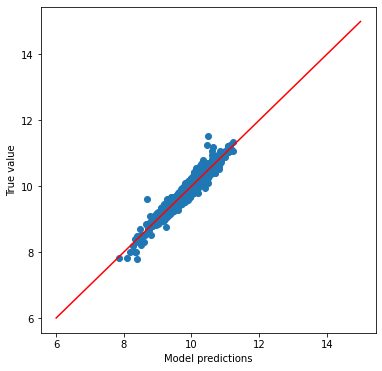

<IPython.core.display.Javascript object>

In [76]:
evaluate(linear_model, X_train, X_test, y_train, y_test)

### <p style="color:blue">Nhận xét</p>

In [78]:
"""
=> mô hình đạt kết quả tốt,
Variance score cao,
R-squared của cả train và test đều cao (>90%)
RMSE, MAE, MSE của cả train và test đều thấp

=> model phù hợp với dữ liệu
"""

'\n=> mô hình đạt kết quả tốt,\nVariance score cao,\nR-squared của cả train và test đều cao (>90%)\nRMSE, MAE, MSE của cả train và test đều thấp\n\n=> model phù hợp với dữ liệu\n'

<IPython.core.display.Javascript object>

### Decision Tree

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

<IPython.core.display.Javascript object>

In [86]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model_k = DecisionTreeRegressor()
kfold = KFold(n_splits=10)
results = cross_val_score(model_k, X, y, cv=kfold)
print("Accuracy: %.2f%% - std: %.2f%%" % (results.mean() * 100, results.std() * 100))
print(results)

Accuracy: 88.80% - std: 2.36%
[0.90234552 0.91893756 0.86015408 0.88659394 0.91498649 0.84846505
 0.90378862 0.90325566 0.88208725 0.85964082]


<IPython.core.display.Javascript object>

In [87]:
"""
Kết quả ổn định => có thể chọn thuật toán này
"""

'\nKết quả ổn định => có thể chọn thuật toán này\n'

<IPython.core.display.Javascript object>

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_param = {
    "criterion": ["mse", "mae"],
    "min_samples_split": [10, 20, 40, 60, 80, 120, 150, 200, 250],
    "max_depth": [2, 6, 8, 10, 15, 18, 20],
    "min_samples_leaf": [20, 40, 100, 130, 150, 200],
    "max_leaf_nodes": [5, 20, 100, 120, 150, 200],
}
start = time.time()
dc_model = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(), param_distributions=tree_param, cv=5
)
dc_model.fit(X_train, y_train)
print(dc_model.best_params_)
end = time.time()
print("run time: ", end - start)

{'min_samples_split': 40, 'min_samples_leaf': 20, 'max_leaf_nodes': 120, 'max_depth': 10, 'criterion': 'mse'}
run time:  16.481956243515015


<IPython.core.display.Javascript object>

In [80]:
"""
với một vài trường hợp test thử, ta nhận thấy Decision Tree Regressor có params là
'min_samples_split': 40, 'min_samples_leaf': 20, 'max_leaf_nodes': 120, 'max_depth': 10, 'criterion': 'mse'

"""

"\nvới một vài trường hợp test thử, ta nhận thấy Decision Tree Regressor có params là\n'min_samples_split': 40, 'min_samples_leaf': 20, 'max_leaf_nodes': 120, 'max_depth': 10, 'criterion': 'mse'\n\n"

<IPython.core.display.Javascript object>

Variance score:  0.9092482527377145

***TRAINIG RESULTS***: 
R-squared train dataset: 0.9102992215625626
MSE train dataset: 0.02115670127827762
RMSE train dataset: 0.14545343336710076
MAE train dataset: 0.1028210376311685

***TEST RESULTS***: 
R-squared test dataset: 0.9048144061374288
MSE test dataset: 0.021493761599992604
RMSE test dataset: 0.14660750867534925
MAE test dataset: 0.10655150144563488


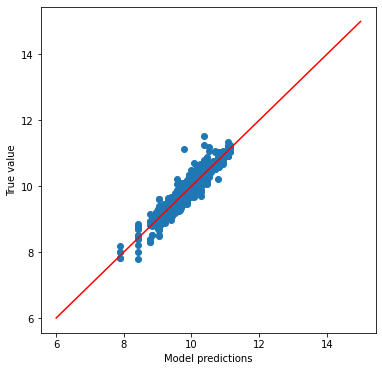

<IPython.core.display.Javascript object>

In [65]:
evaluate(dc_model, X_train, X_test, y_train, y_test)

### <p style="color:blue">Nhận xét</p>

In [81]:
"""
=> mô hình có kết quả tốt,
Variance score cao,
R-squared của cả train và test đều cao 
RMSE, MAE, MSE của cả train và test đều thấp

=> model phù hợp với dữ liệu
"""

'\n=> mô hình có kết quả tốt,\nVariance score cao,\nR-squared của cả train và test đều cao \nRMSE, MAE, MSE của cả train và test đều thấp\n\n=> model phù hợp với dữ liệu\n'

<IPython.core.display.Javascript object>

### KNN

In [88]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model_k = KNeighborsRegressor()
kfold = KFold(n_splits=10)
results = cross_val_score(model_k, X, y, cv=kfold)
print("Accuracy: %.2f%% - std: %.2f%%" % (results.mean() * 100, results.std() * 100))
print(results)

Accuracy: 48.91% - std: 4.02%
[0.50034048 0.51212554 0.48198244 0.45255671 0.51276178 0.45134345
 0.57658956 0.51174931 0.45631521 0.43526293]


<IPython.core.display.Javascript object>

In [89]:
"""
Kết quả có vẻ thấp => ta thử kiểm chứng lại
"""

'\nKết quả có vẻ thấp => ta thử kiểm chứng lại\n'

<IPython.core.display.Javascript object>

In [67]:
from sklearn.neighbors import KNeighborsRegressor

params = {
    "weights": ["uniform", "distance"],
    "n_neighbors": list(range(3, 31, 2)),
}
start = time.time()
knn_model = GridSearchCV(KNeighborsRegressor(), params, cv=5)
knn_model.fit(X_train, y_train)
print(knn_model.best_params_)
end = time.time()
print("run time: ", end - start)

{'n_neighbors': 17, 'weights': 'distance'}
run time:  28.95602321624756


<IPython.core.display.Javascript object>

In [68]:
"""
với KNN Regressor, 'n_neighbors': 17, 'weights': 'distance' là các params phù hợp với dataset
"""

"\nvới KNN Regressor, 'n_neighbors': 17, 'weights': 'distance' là các params phù hợp với dataset\n"

<IPython.core.display.Javascript object>

Variance score:  0.9284968740035673

***TRAINIG RESULTS***: 
R-squared train dataset: 0.9997600772586889
MSE train dataset: 5.6587845236203374e-05
RMSE train dataset: 0.007522489297845719
MAE train dataset: 0.0007007420316570837

***TEST RESULTS***: 
R-squared test dataset: 0.6307584831856181
MSE test dataset: 0.08337804927378537
RMSE test dataset: 0.2887525744885842
MAE test dataset: 0.21705221547156586


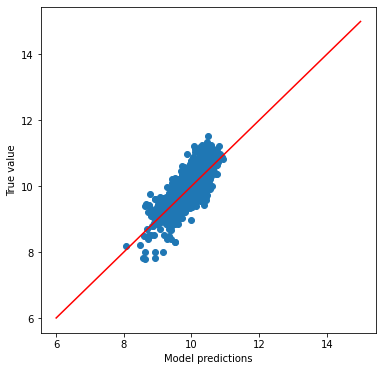

<IPython.core.display.Javascript object>

In [69]:
evaluate(knn_model, X_train, X_test, y_train, y_test)

In [135]:
"""
=> model dù có các điểm số cao nhưng R-squared test lại khá thấp so với R-squared train
=> overfitting
"""

'\n=> model dù có các điểm số cao nhưng R-squared test lại khá thấp so với R-squared train\n=> overfitting\n'

<IPython.core.display.Javascript object>

### Random Forest Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor


<IPython.core.display.Javascript object>

In [91]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model_k = RandomForestRegressor()
kfold = KFold(n_splits=10)
results = cross_val_score(model_k, X, y, cv=kfold)
print("Accuracy: %.2f%% - std: %.2f%%" % (results.mean() * 100, results.std() * 100))
print(results)

Accuracy: 93.44% - std: 1.63%
[0.94240933 0.95306999 0.90996154 0.9194751  0.94668715 0.90972183
 0.94966839 0.95096197 0.93914416 0.92278754]


<IPython.core.display.Javascript object>

In [93]:
"""
Kết quả cao và ổn định => có thể sử dụng thuật toán này
"""

'\nKết quả cao và ổn định => có thể sử dụng thuật toán này\n'

<IPython.core.display.Javascript object>

In [99]:
param_grid = {
    "n_estimators": [20, 25, 50],
    "max_features": ["auto", "sqrt", "log2"],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "random_state": [1, 42],
}
start = time.time()
rf_model = RandomizedSearchCV(
    RandomForestRegressor(), param_distributions=param_grid, cv=5
)
rf_model.fit(X_train, y_train)
print(rf_model.best_params_)
end = time.time()
print("run time: ", end - start)

{'random_state': 1, 'n_estimators': 25, 'min_samples_split': 4, 'max_features': 'log2'}
run time:  11.697751522064209


<IPython.core.display.Javascript object>

In [102]:
"""
vậy, params khá tốt của model này trong dataset là
'random_state': 1, 'n_estimators': 25, 'min_samples_split': 4, 'max_features': 'log2'
"""

"\nvậy, params khá tốt của model này trong dataset là\n'random_state': 1, 'n_estimators': 25, 'min_samples_split': 4, 'max_features': 'log2'\n"

<IPython.core.display.Javascript object>

Variance score:  0.9781180485298899

***TRAINIG RESULTS***: 
R-squared train dataset: 0.9838030184581156
MSE train dataset: 0.0038201976176876324
RMSE train dataset: 0.06180774723032407
MAE train dataset: 0.04112588007315092

***TEST RESULTS***: 
R-squared test dataset: 0.9543584508005712
MSE test dataset: 0.010306271545284832
RMSE test dataset: 0.10151980863498922
MAE test dataset: 0.07192209087009684


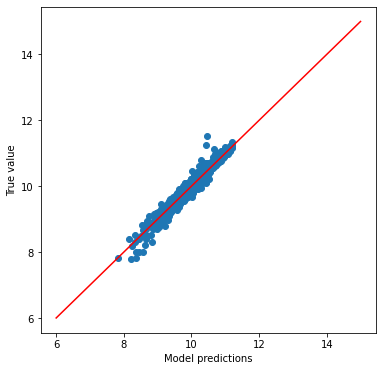

<IPython.core.display.Javascript object>

In [101]:
evaluate(rf_model, X_train, X_test, y_train, y_test)

In [141]:
"""
=> mô hình đạt kết quả tốt,
Variance score cao,
R-squared của cả train và test đều cao (>90%)
RMSE, MAE, MSE của cả train và test đều thấp

=> model phù hợp với dữ liệu
"""

'\n=> mô hình đạt kết quả tốt,\nVariance score cao,\nR-squared của cả train và test đều cao (>90%)\nRMSE, MAE, MSE của cả train và test đều thấp\n\n=> model phù hợp với dữ liệu\n'

<IPython.core.display.Javascript object>

### SVM (SVR)

In [94]:
model_k = svm.SVR()
kfold = KFold(n_splits=10)
results = cross_val_score(model_k, X, y, cv=kfold)
print("Accuracy: %.2f%% - std: %.2f%%" % (results.mean() * 100, results.std() * 100))
print(results)

Accuracy: 45.42% - std: 4.78%
[0.46520212 0.47571365 0.41744949 0.39485149 0.46581376 0.38207172
 0.52490022 0.5347265  0.45054179 0.43084884]


<IPython.core.display.Javascript object>

In [95]:
"""
=> kết quả thấp, ta cùng thử lại
"""

'\n=> kết quả thấp, ta cùng thử lại\n'

<IPython.core.display.Javascript object>

In [ ]:
parameters = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["rbf", "linear"],
}

start = time.time()
svr_model = RandomizedSearchCV(svm.SVR(), param_distributions=parameters, cv=5)
svr_model.fit(X_train, y_train)
print(svr_model.best_params_)
end = time.time()
print("run time: ", end - start)

In [158]:
"""
vậy, với SVR thì best params trong dictionary trên là
'C': 0.1, 'gamma': 1, 'kernel': 'rbf'
"""

"\nvậy, với SVR thì best params trong dictionary trên là\n'C': 0.1, 'gamma': 1, 'kernel': 'rbf'\n"

<IPython.core.display.Javascript object>

In [ ]:
evaluate(svr_model, X_train, X_test, y_train, y_test)

### XGBOOST

In [24]:
import xgboost as xgb

n_estimators = [50, 100]
max_depth = [2, 3, 5]
#booster = ['gbtree', 'gblinear']
base_score = [0.2, 0.25, 0.5]
learning_rate = [0.05, 0.1, 0.5]
min_child_weight = [1, 2, 3]
subsample = [0.5, 0.75]
colsample_bytree = [0.5, 0.75]
colsample_bynode = [0.5, 0.75]
colsample_bylevel = [0.5, 0.75]

<IPython.core.display.Javascript object>

In [26]:
params_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "learning_rate": learning_rate,
    "min_child_weight": min_child_weight,
    "base_score": base_score,
    "subsample": subsample,
}

start = time.time()
xgb_model = RandomizedSearchCV(
    xgb.XGBRegressor(), params_grid, cv=3, scoring="f1", n_jobs=-1, verbose=1
)
xgb_model.fit(X_train, y_train)
print(xgb_model.best_params_)
end = time.time()
print("run time: ", end - start)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'subsample': 0.75, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 2, 'learning_rate': 0.5, 'base_score': 0.25}
run time:  7.331140995025635


<IPython.core.display.Javascript object>

In [19]:
"""
vậy, best parameters của xgboost là:
'subsample': 0.75, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 2, 'learning_rate': 0.5, 'base_score': 0.25
"""

"\nvậy, best parameters của xgboost là:\n'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1 \n\n"

<IPython.core.display.Javascript object>

In [30]:
xgb2_model = xgb.XGBRegressor(subsample= 0.75, n_estimators= 100, min_child_weight= 2, max_depth= 2, learning_rate= 0.5,base_score= 0.25).fit(X_train, y_train)


<IPython.core.display.Javascript object>

Variance score:  0.9480931212535614

***TRAINIG RESULTS***: 
R-squared train dataset: 0.9491090085667917
MSE train dataset: 0.012003078705261384
RMSE train dataset: 0.10955856290250153
MAE train dataset: 0.07961350349642397

***TEST RESULTS***: 
R-squared test dataset: 0.9438244021436649
MSE test dataset: 0.01268495429890788
RMSE test dataset: 0.11262750240908248
MAE test dataset: 0.08319711637689628


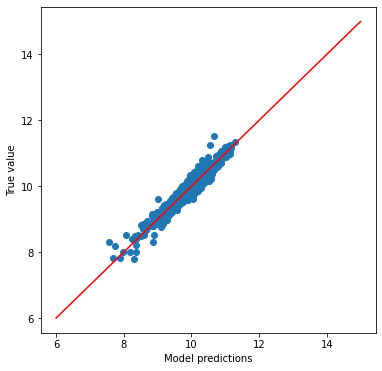

<IPython.core.display.Javascript object>

In [31]:
evaluate(xgb2_model, X_train, X_test, y_train, y_test)

In [32]:
"""
=> mô hình đạt kết quả tốt,
Variance score cao,
R-squared của cả train và test đều cao (>90%)
RMSE, MAE, MSE của cả train và test đều thấp

=> model phù hợp với dữ liệu
"""

'\n=> mô hình đạt kết quả tốt,\nVariance score cao,\nR-squared của cả train và test đều cao (>90%)\nRMSE, MAE, MSE của cả train và test đều thấp\n\n=> model phù hợp với dữ liệu\n'

<IPython.core.display.Javascript object>

## KẾT LUẬN

In [97]:
"""
Nhìn chung, trong các thuật toán Linear Regression, KNN, SVM, XGBRegressor, DecisionTree, Random Forest
KNN, SVM đưa ra các kết quả thấp, overfitting

Linear Regression, XGBRegressor, DecisionTree, Random Forest đưa ra các kết quả cao, phù hợp với model
có thể chọn 1 trong các thuật toán này

Vd: em chọn thuật toán Random Forest vì đây là thuật toán đưa ra kết quả cao nhất.
Tuy nhiên, chúng ta hoàn toàn có thể chọn Linear Regression hay DecisionTree, vừa có điểm số cao, vừa có thời gian chạy nhanh
"""

'\nNhìn chung, trong các thuật toán Linear Regression, KNN, SVM, XGBRegressor, DecisionTree, Random Forest\nKNN, SVM đưa ra các kết quả thấp, overfitting\n\nLinear Regression, XGBRegressor, DecisionTree, Random Forest đưa ra các kết quả cao, phù hợp với model\ncó thể chọn 1 trong các thuật toán này\n\nVd: em chọn thuật toán Random Forest vì đây là thuật toán đưa ra kết quả cao nhất.\nTuy nhiên, chúng ta hoàn toàn có thể chọn Linear Regression hay DecisionTree, vừa có điểm số cao, vừa có thời gian chạy nhanh\n'

<IPython.core.display.Javascript object>

### Lưu model

In [103]:
import pickle

with open("rdf_model_bmw", "wb") as file:
    pickle.dump(rf_model, file)

<IPython.core.display.Javascript object>

In [104]:
# sử dụng (đọc model)
with open("rdf_model_bmw", "rb") as file:
    model_ecoli = pickle.load(file)

<IPython.core.display.Javascript object>